In [1]:
import sys

In [2]:
sys.path.insert(0, "../../src/")

In [3]:
import analysis.common as ac
import analysis.power_drain_manual as ap

In [22]:
reload(ap)

<module 'analysis.power_drain_manual' from '../../src/analysis/power_drain_manual.py'>

In [5]:
(iphone_ids, android_ids, phone_labels) = ac.setupPaths()

In [6]:
import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt

In [7]:
display_names = [ac.get_display_name(label) for label in phone_labels]

In [8]:
drain_df_map = {}

In [9]:
drain_df_map["ios.1"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.1/power_logs/nd_manual_1449344421.log")
drain_df_map["ios.2"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.2/power_logs/noha5m_manual_1449344421.log")
drain_df_map["ios.3"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.3/power_logs/geo100m-ha5m_manual_1449344421.log")

In [10]:
drain_df_map["android.1"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.1/power_logs/nd_manual_1449344421.log")
drain_df_map["android.2"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.2/power_logs/noha2s_manual_1449344421.log")
drain_df_map["android.3"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.3/power_logs/geo100m-ha2s_manual_1449344421.log")

In [11]:
regime_map = {}

In [12]:
regime_map["ios.1"] = "nd"
regime_map["ios.2"] = "hafs"
regime_map["ios.3"] = "geo-hafs"

In [13]:
regime_map["android.1"] = "nd"
regime_map["android.2"] = "hafs"
regime_map["android.3"] = "geo-hafs"

In [14]:
for drain_df in drain_df_map.values():
    drain_df["fmt_time"] = drain_df.ts.map(lambda(t): pydt.datetime.fromtimestamp(t))

In [15]:
drain_df

key            ts  value                fmt_time
0   battery_level  1.449344e+09    100 2015-12-05 11:40:21.210
1   battery_level  1.449346e+09    100 2015-12-05 12:07:38.270
2   battery_level  1.449347e+09    100 2015-12-05 12:30:45.170
3   battery_level  1.449350e+09    100 2015-12-05 13:13:51.810
4   battery_level  1.449351e+09    100 2015-12-05 13:32:57.080
5   battery_level  1.449354e+09    100 2015-12-05 14:16:23.330
6   battery_level  1.449356e+09    100 2015-12-05 14:46:05.360
7   battery_level  1.449358e+09    100 2015-12-05 15:27:15.450
8   battery_level  1.449360e+09     99 2015-12-05 16:03:17.090
9   battery_level  1.449362e+09     97 2015-12-05 16:35:39.400
10  battery_level  1.449364e+09     96 2015-12-05 17:06:45.060
11  battery_level  1.449366e+09     95 2015-12-05 17:32:08.910
12  battery_level  1.449368e+09     95 2015-12-05 18:05:02.490
13  battery_level  1.449369e+09     95 2015-12-05 18:36:35.970
14  battery_level  1.449371e+09     93 2015-12-05 19:04:39.300
15  battery_level  1.449373e+09     91 2015-12-05 19:38:06.250
16  battery_level  1.449376e+09     89 2015-12-05 20:23:23.890
17  battery_level  1.449378e+09     88 2015-12-05 21:05:25.670
18  battery_level  1.449379e+09     87 2015-12-05 21:22:29.330
19  battery_level  1.449417e+09     80 2015-12-06 07:51:26.490
20  battery_level  1.449419e+09     80 2015-12-06 08:29:22.330
21  battery_level  1.449423e+09     79 2015-12-06 09:21:56.950
22  battery_level  1.449424e+09     79 2015-12-06 09:51:17.910
23  battery_level  1.449425e+09     78 2015-12-06 10:09:58.940
24  battery_level  1.449428e+09     75 2015-12-06 10:48:53.240
25  battery_level  1.449430e+09     74 2015-12-06 11:27:45.180
26  battery_level  1.449431e+09     73 2015-12-06 11:42:42.880
27  battery_level  1.449432e+09     72 2015-12-06 12:01:06.290

In [16]:
ground_truth_df = ap.get_ground_truth_df(drain_df, [[0,7,8,13,14,17,18,19,22,23,25,27], 
                                                    ["active", "moving", "active", "moving", "active", "moving","passive","active","moving","active","moving"]])
ground_truth_df.to_csv("../../ground_truth/compare_hafs.2015-12-04-05/states.summary")

In [17]:
ground_truth_df

start_index      start_ts          start_fmt_time  start_value  end_index  \
0             0  1.449344e+09 2015-12-05 11:40:21.210          100          7   
1             7  1.449358e+09 2015-12-05 15:27:15.450          100          8   
2             8  1.449360e+09 2015-12-05 16:03:17.090           99         13   
3            13  1.449369e+09 2015-12-05 18:36:35.970           95         14   
4            14  1.449371e+09 2015-12-05 19:04:39.300           93         17   
5            17  1.449378e+09 2015-12-05 21:05:25.670           88         18   
6            18  1.449379e+09 2015-12-05 21:22:29.330           87         19   
7            19  1.449417e+09 2015-12-06 07:51:26.490           80         22   
8            22  1.449424e+09 2015-12-06 09:51:17.910           79         23   
9            23  1.449425e+09 2015-12-06 10:09:58.940           78         25   
10           25  1.449430e+09 2015-12-06 11:27:45.180           74         27   

          end_ts            end_fmt_time  end_value    state  
0   1.449358e+09 2015-12-05 15:27:15.450        100   active  
1   1.449360e+09 2015-12-05 16:03:17.090         99   moving  
2   1.449369e+09 2015-12-05 18:36:35.970         95   active  
3   1.449371e+09 2015-12-05 19:04:39.300         93   moving  
4   1.449378e+09 2015-12-05 21:05:25.670         88   active  
5   1.449379e+09 2015-12-05 21:22:29.330         87   moving  
6   1.449417e+09 2015-12-06 07:51:26.490         80  passive  
7   1.449424e+09 2015-12-06 09:51:17.910         79   active  
8   1.449425e+09 2015-12-06 10:09:58.940         78   moving  
9   1.449430e+09 2015-12-06 11:27:45.180         74   active  
10  1.449432e+09 2015-12-06 12:01:06.290         72   moving

In [18]:
drain_df_map.keys()

['android.2', 'android.3', 'android.1', 'ios.1', 'ios.2', 'ios.3']

adding annotations for 0, 2015-12-05 11:40:21.210000, 2015-12-05 15:27:15.450000
adding annotations for 1, 2015-12-05 15:27:15.450000, 2015-12-05 16:03:17.090000
adding annotations for 2, 2015-12-05 16:03:17.090000, 2015-12-05 18:36:35.970000
adding annotations for 3, 2015-12-05 18:36:35.970000, 2015-12-05 19:04:39.300000
adding annotations for 4, 2015-12-05 19:04:39.300000, 2015-12-05 21:05:25.670000
adding annotations for 5, 2015-12-05 21:05:25.670000, 2015-12-05 21:22:29.330000
adding annotations for 6, 2015-12-05 21:22:29.330000, 2015-12-06 07:51:26.490000
adding annotations for 7, 2015-12-06 07:51:26.490000, 2015-12-06 09:51:17.910000
adding annotations for 8, 2015-12-06 09:51:17.910000, 2015-12-06 10:09:58.940000
adding annotations for 9, 2015-12-06 10:09:58.940000, 2015-12-06 11:27:45.180000
adding annotations for 10, 2015-12-06 11:27:45.180000, 2015-12-06 12:01:06.290000
adding annotations for 0, 2015-12-05 11:40:21.210000, 2015-12-05 15:27:15.450000
adding annotations for 1, 2

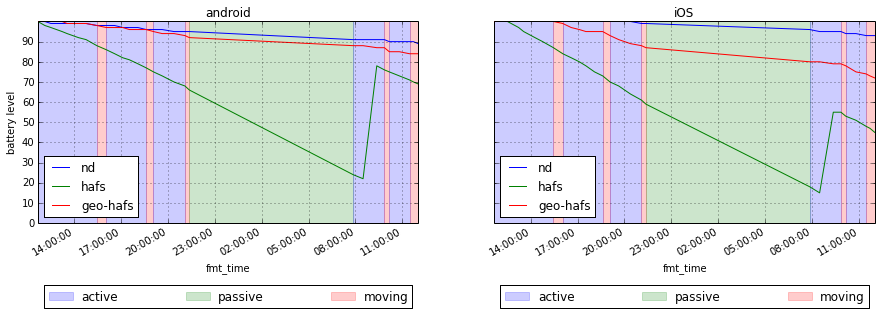

In [23]:
(fig, axes) = ap.display_drain_over_day(drain_df_map, ground_truth_df, regime_map)

displaying 0, android.1 (nd)
displaying 1, android.2 (hafs)
displaying 2, android.3 (geo-hafs)
displaying 3, ios.1 (nd)
displaying 4, ios.2 (hafs)
displaying 5, ios.3 (geo-hafs)


(<matplotlib.figure.Figure at 0x108f3e250>,
 array([<matplotlib.axes.AxesSubplot object at 0x10a176b10>,
        <matplotlib.axes.AxesSubplot object at 0x10a6bae90>], dtype=object))

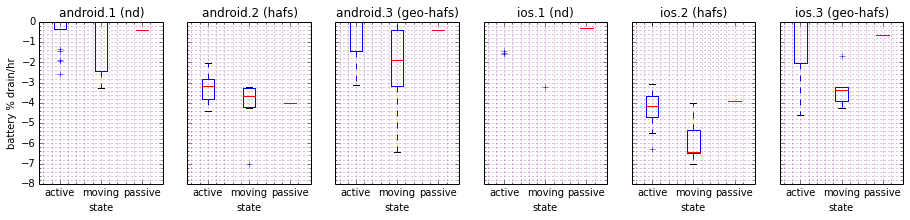

In [20]:
ap.display_per_state_drain(drain_df_map, ground_truth_df, regime_map)

In [21]:
state_diff_df_map = {}
for i, key in enumerate(sorted(drain_df_map.keys())):
    print "displaying %d, %s (%s)" % (i, key, regime_map[key])
    state_diff_df_map[key] = ap.get_state_diff_df(drain_df_map[key], ground_truth_df)
    print state_diff_df_map[key].groupby('state').rate.describe()

displaying 0, android.1 (nd)
state         
active   count    20.000000
         mean     -0.460435
         std       0.849608
         min      -2.595717
         25%      -0.331170
         50%       0.000000
         75%       0.000000
         max       0.000000
moving   count     6.000000
         mean     -1.078991
         std       1.671644
         min      -3.262613
         25%      -2.408499
         50%       0.000000
         75%       0.000000
         max       0.000000
passive  count     1.000000
         mean     -0.381587
         std            NaN
         min      -0.381587
         25%      -0.381587
         50%      -0.381587
         75%      -0.381587
         max      -0.381587
dtype: float64
displaying 1, android.2 (ha2s)
state         
active   count    19.000000
         mean     -3.331376
         std       0.676975
         min      -4.398128
         25%      -3.830873
         50%      -3.163667
         75%      -2.819330
         max      -2.020168

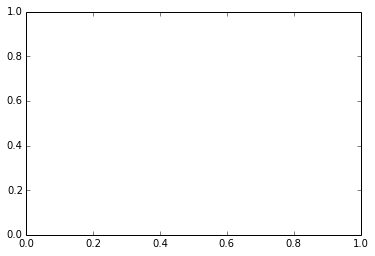

In [21]:
fig, ax = plt.subplots()

In [22]:
df = pd.DataFrame()

In [ ]:
df.plot()